In [52]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as K

REF: https://medium.com/@kenneth.ca95/a-guide-to-transfer-learning-with-keras-using-resnet50-a81a4a28084b

In [10]:
def preprocess_data(X,Y):
    X_p = K.applications.resnet50.preprocess_input(X)
    Y_p = K.utils.to_categorical(Y,10)
    return X_p,Y_p

In [14]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train,y_train = preprocess_data(x_train,y_train)
x_test,y_test = preprocess_data(x_test,y_test)
print(y_train.shape, x_train.shape)
print(y_test.shape,x_test.shape)

(50000, 10) (50000, 32, 32, 3)
(10000, 10) (10000, 32, 32, 3)


In [15]:
input_t = K.Input(shape=(32,32,3))
res_model = K.applications.ResNet50(include_top=False,
                                    weights="imagenet",
                                    input_tensor=input_t)

In [22]:
for layer in res_model.layers:
    layer.trainable = False

In [23]:
for i, layer in enumerate(res_model.layers):
    print(i,layer.name, "-",layer.trainable)

0 input_1 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv - 

In [47]:
model = K.models.Sequential()
model.add(res_model)
model.add(K.layers.Flatten())
model.add(K.layers.Dense(1000,activation="relu"))
model.add(K.layers.Dense(10,activation="softmax"))

In [48]:
check_point = K.callbacks.ModelCheckpoint(filepath="cifar10.h5", monitor="val_acc", mode="max", save_best_only=True)

In [49]:
model.compile(loss="categorical_crossentropy", optimizer=K.optimizers.RMSprop(learning_rate=2e-5),
              metrics=["accuracy"])


In [50]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_14 (Dense)            (None, 1000)              2049000   
                                                                 
 dense_15 (Dense)            (None, 10)                10010     
                                                                 
Total params: 25,646,722
Trainable params: 2,059,010
Non-trainable params: 23,587,712
_________________________________________________________________


In [51]:
history = model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_test,y_test),
                    callbacks=[check_point])

model.save("cifar10.h5")

Epoch 1/10
1563/1563 [==============================] - 144s 90ms/step - loss: 1.4570 - accuracy: 0.5111 - val_loss: 1.2277 - val_accuracy: 0.5876
Epoch 2/10
1563/1563 [==============================] - 146s 93ms/step - loss: 1.0926 - accuracy: 0.6329 - val_loss: 1.1389 - val_accuracy: 0.6164
Epoch 3/10
1563/1563 [==============================] - 146s 93ms/step - loss: 0.9705 - accuracy: 0.6727 - val_loss: 1.0955 - val_accuracy: 0.6330
Epoch 4/10
1563/1563 [==============================] - 142s 91ms/step - loss: 0.8886 - accuracy: 0.7012 - val_loss: 1.0766 - val_accuracy: 0.6402
Epoch 5/10
1563/1563 [==============================] - 142s 91ms/step - loss: 0.8254 - accuracy: 0.7242 - val_loss: 1.0654 - val_accuracy: 0.6487
Epoch 6/10
1563/1563 [==============================] - 144s 92ms/step - loss: 0.7730 - accuracy: 0.7428 - val_loss: 1.0642 - val_accuracy: 0.6525
Epoch 7/10
1563/1563 [==============================] - 154s 98ms/step - loss: 0.7281 - accuracy: 0.7612 - val_loss: 1

In [55]:
history.history

{'loss': [1.4570443630218506,
  1.0925908088684082,
  0.9705339670181274,
  0.8886002898216248,
  0.8253535032272339,
  0.7730326056480408,
  0.7280656099319458,
  0.6882229447364807,
  0.6521061658859253,
  0.6193686723709106],
 'accuracy': [0.5110800266265869,
  0.6329399943351746,
  0.6726999878883362,
  0.7011799812316895,
  0.7242400050163269,
  0.7428399920463562,
  0.7612400054931641,
  0.7750800251960754,
  0.7887399792671204,
  0.8016800284385681],
 'val_loss': [1.227726697921753,
  1.138947606086731,
  1.0955135822296143,
  1.0766199827194214,
  1.0654207468032837,
  1.0642328262329102,
  1.0545320510864258,
  1.0543296337127686,
  1.0538541078567505,
  1.056918978691101],
 'val_accuracy': [0.5875999927520752,
  0.6164000034332275,
  0.6330000162124634,
  0.6402000188827515,
  0.6486999988555908,
  0.6524999737739563,
  0.6567999720573425,
  0.6571000218391418,
  0.6597999930381775,
  0.6606000065803528]}

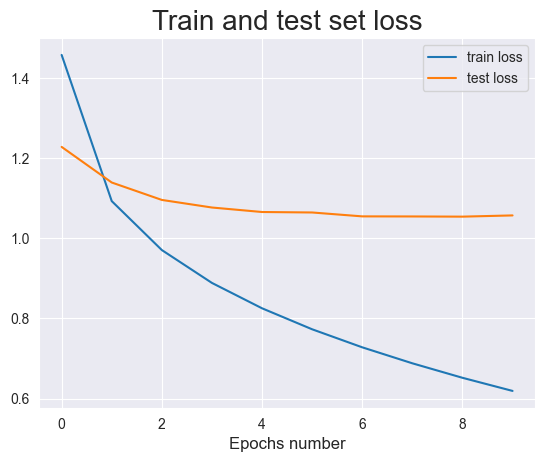

In [59]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
model_acc = history.history['accuracy']
model_acc_test = history.history['val_accuracy']

epochs = range(len(train_loss))
plt.plot(epochs, train_loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.title('Train and test set loss', fontsize=20)
plt.xlabel('Epochs number', fontsize=12)
plt.legend()

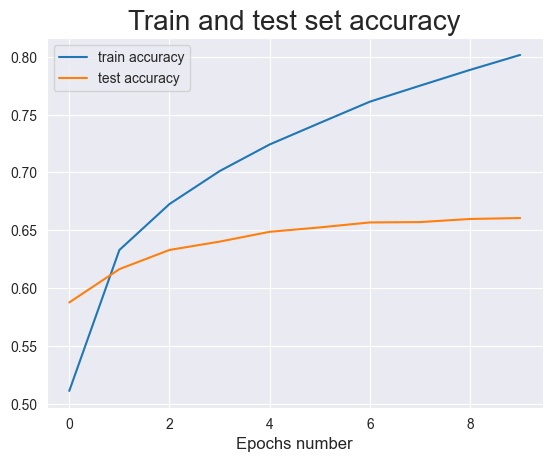

In [60]:
plt.plot(epochs, model_acc, label='train accuracy')
plt.plot(epochs, model_acc_test, label='test accuracy')
plt.title('Train and test set accuracy', fontsize=20)
plt.xlabel('Epochs number', fontsize=12)
plt.legend()